<a href="https://www.kaggle.com/code/anjusukumaran4/natural-language-processing-with-disaster-tweets?scriptVersionId=138045154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### The goal is to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t using dataset of 10,000 tweets that were hand classified.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Wrangling

Data wrangling is the process of converting raw data into a usable form.

### Load data

In [2]:
train_data=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_data=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

Data exploration - train set

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In the target column

0 - not a tweet related to disaster

1 - tweet related to disaster

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Removing unwanted columns

In [5]:
train_data=train_data.drop(['keyword', 'location'],axis=1)
train_data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


### Analysing target column

In [6]:
#to count the unique values in target column
train_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

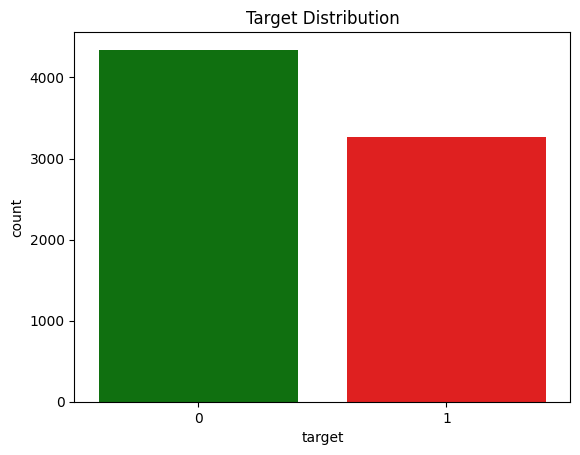

In [7]:
#plotting
sns.countplot(x='target',data=train_data,palette=['g','r'])
plt.title('Target Distribution')

## Text Preprocessing and Vectorization

Importing required libraries

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

Explanations

stopwords : Stopwords are the English words which does not add much meaning to a sentence eg 'a','the' etc. They can safely be ignored without sacrificing the meaning of the sentence.

word tokenize : word_tokenize is a function in Python that splits a given sentence into words using the NLTK library.

SnowballStemmer : Snowball Stemmer is a stemming algorithm. Stemmers remove morphological affixes from words, leaving only the word stem.

TfidfVectorizer : TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.TF-IDF (Term Frequency - Inverse Document Frequency) is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document.


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [10]:
#downloading stopword
nltk.download('stopwords')
english_stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#to view stop words
','.join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [12]:
#stemming
stemmer=SnowballStemmer(language='english')

In [13]:
#defining a function for stemming
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]    #isalpha() method is to check if all the characters are alphabet letters (a-z)

In [14]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(train_data['text'])
y_train=train_data['target']
X_test=vectorizer.transform(test_data['text'])       
# we're NOT using .fit_transform() here. Using just .transform() makes sure that the tokens in the train vectors are the only ones mapped to the test vectors - 
#i.e. that the train and test vectors use the same set of tokens.

CountVectorizer is used to count the words in each tweet and turn them into data our machine learning model can process. Here vector is a set of numbers that a machine learning model can work with.

## Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Train - Test split

In [16]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

Logistic Regression

In [17]:
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Prediction and Accuracy

In [18]:
from sklearn.metrics import accuracy_score

y_pred=lr_model.predict(X_val)
val_accuracy=accuracy_score(y_val,y_pred)
print('Accuracy : ',round(val_accuracy *100,2),'%')

Accuracy :  80.3 %


In [19]:
#test set prediction
y_pred_test=lr_model.predict(X_test)

In [20]:
Submission = pd.DataFrame({'id' : test_data['id'],'target':y_pred_test})
Submission.to_csv('Submission.csv',index=False)